In [26]:
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
import preprocessor as p
import os
import time

In [25]:
import numpy as np
import os

# Word processing libraries
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Widen the size of each cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## loading data we collected 

In [9]:
tweets_1st = pd.read_csv(os.getcwd() + '/data/' + '/20200620_075152corona_tweets.csv')
tweets_2nd = pd.read_csv(os.getcwd() + '/data/' + '/20200620_090628corona_tweets.csv')
tweets_3rd = pd.read_csv(os.getcwd() + '/data/' + '/20200621_083711corona_tweets.csv')
tweets_4th = pd.read_csv(os.getcwd() + '/data/' + '/20200621_093813corona_tweets.csv')
tweets_5th = pd.read_csv(os.getcwd() + '/data/' + '/20200621_101115corona_tweets.csv')
tweets_6th = pd.read_csv(os.getcwd() + '/data/' + '/20200622_072958corona_tweets.csv')
tweets_7th = pd.read_csv(os.getcwd() + '/data/' + '/20200622_082446corona_tweets.csv')
tweets_8th = pd.read_csv(os.getcwd() + '/data/' + '/20200622_09315corona_tweets.csv')
tweets_9th = pd.read_csv(os.getcwd() + '/data/' + '/20200623_071902corona_tweets.csv')

In [10]:

# Concat the two dataset together:
data = pd.concat([tweets_1st, tweets_2nd, tweets_3rd,tweets_4th,tweets_5th,tweets_6th,tweets_7th,tweets_8th,tweets_9th], axis = 0)

print('Size of concatenated dataset is:', data.shape)

# Reset_index
data.reset_index(inplace = True, drop = True)
data.head()
print(data.info())

Size of concatenated dataset is: (26500, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26500 entries, 0 to 26499
Data columns (total 11 columns):
username          26500 non-null object
acctdesc          21520 non-null object
location          17054 non-null object
following         26500 non-null int64
followers         26500 non-null int64
totaltweets       26500 non-null int64
usercreatedts     26500 non-null object
tweetcreatedts    26500 non-null object
retweetcount      26500 non-null int64
text              26500 non-null object
hashtags          26500 non-null object
dtypes: int64(4), object(7)
memory usage: 2.2+ MB
None


In [11]:

# Check out the number of unique users in the dataset
# It can be seen that some users are more proactive on the social media platform than others.
data['username'].value_counts()

schwaid            24
claster6772        17
wenotdoneyet       10
NaveenPunekar       9
marciasgreen        8
John_Scotus         8
carlatodd2          8
TSimmon51137089     8
mohitsmartlove      7
TaraJaee            7
RUAwaken            7
NewsNetNews         7
lenoraq_mp          7
vipeaceful__        7
CovidUpdatesEA      6
MunawarSarker       6
Yijungyon           6
ChrisMa93282593     6
BTSHeadliner        6
corona_tracking     6
BillEllson          5
NewAgeBDcom         5
IndianClaw          5
i_trafficKZN        5
concernedbanan      5
Pelicans2016        5
Jonnylito           5
hk0887              5
AjbaniAnkush        5
im_ash_0            5
                   ..
tweetheart717       1
LoliPantsu0         1
gatheredwaters      1
tarekrolyat         1
DorseyFilm          1
brainwxrms_         1
adoptapet_77        1
Jehsee182           1
cyberhickies        1
FloridaBengals      1
Gujjusguj           1
barbara451          1
smargaretmead       1
sIeezi              1
JoeKnowsBa

In [12]:

# Let's drop duplicated rows:
print('Initial size of dataset before dropping duplicated rows:', data.shape)
data.drop_duplicates(keep = False, inplace = True)

print('Current size of dataset after dropping duplicated rows, if any, is:', data.shape)
print(data.head())

Initial size of dataset before dropping duplicated rows: (26500, 11)
Current size of dataset after dropping duplicated rows, if any, is: (26436, 11)
        username                                           acctdesc  \
0          nvg93   social distance, wear a mask and wash your hands   
1      AveryRyla                         🇺🇸 A M E R I C A First  🇺🇸   
2       ItIsMeAG                                    Dum Spiro Spero   
3  jerrywoo21793                                                NaN   
4       bdrortho  orthodontist/husband/father of 4/love outdoor ...   

                location  following  followers  totaltweets  \
0             Buford, WY        367        163         8960   
1          United States        542       1315        21449   
2         Charleston, SC        164         71        18103   
3   Saint Petersburg, FL        124         19          434   
4  los Altos, California        130         85          235   

         usercreatedts       tweetcreatedts  

In [13]:
data.dropna(subset = ['text'], inplace = True)


## Removing  non english words 

In [14]:

# The unicode accounts for chinese  hindi arabiccharacters and punctuations.
def strip_nonenglish_words(string):
    # list of english words
    en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F\u0900-\u097F\u0600-\u06FF]', str(string))
    
    # Remove word from the list, if not english
    for c in string:
        if c not in en_list:
            string = string.replace(c, '')
    return string

In [15]:
# Apply strip_nonenglish_words(...) on the column 'text'
data['text'] = data['text'].apply(lambda x: strip_nonenglish_words(x))
data.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,nvg93,"social distance, wear a mask and wash your hands","Buford, WY",367,163,8960,2009-04-13 21:48:42,2020-06-20 02:05:02,22814,"Trump's rally in Tulsa is indoors, with no soc...",[]
1,AveryRyla,🇺🇸 A M E R I C A First 🇺🇸,United States,542,1315,21449,2010-03-27 21:37:34,2020-06-20 02:05:01,1002,COVID FACTS\nThe virus can travel 6' it cannot...,[]
2,ItIsMeAG,Dum Spiro Spero,"Charleston, SC",164,71,18103,2013-04-18 20:41:46,2020-06-20 02:05:01,153,"COVID is real. Today, we had over 5.4-TIMES th...",[]
3,jerrywoo21793,NaN,"Saint Petersburg, FL",124,19,434,2011-06-15 00:48:51,2020-06-20 02:05:00,22814,"Trump's rally in Tulsa is indoors, with no soc...",[]
4,bdrortho,orthodontist/husband/father of 4/love outdoor ...,"los Altos, California",130,85,235,2009-06-06 00:30:23,2020-06-20 02:04:59,22814,"Trump's rally in Tulsa is indoors, with no soc...",[]


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26436 entries, 0 to 26499
Data columns (total 11 columns):
username          26436 non-null object
acctdesc          21466 non-null object
location          17014 non-null object
following         26436 non-null int64
followers         26436 non-null int64
totaltweets       26436 non-null int64
usercreatedts     26436 non-null object
tweetcreatedts    26436 non-null object
retweetcount      26436 non-null int64
text              26436 non-null object
hashtags          26436 non-null object
dtypes: int64(4), object(7)
memory usage: 2.4+ MB


In [17]:

# Define function to sieve out @users in a tweet:
def mentioned_users(string):
    usernames = re.findall('@[^\s]+', string)
    return usernames


# Create a new column and apply the function on the column 'text'
data['mentioned_users'] = data['text'].apply(lambda x: mentioned_users(x))
data.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,mentioned_users
0,nvg93,"social distance, wear a mask and wash your hands","Buford, WY",367,163,8960,2009-04-13 21:48:42,2020-06-20 02:05:02,22814,"Trump's rally in Tulsa is indoors, with no soc...",[],[]
1,AveryRyla,🇺🇸 A M E R I C A First 🇺🇸,United States,542,1315,21449,2010-03-27 21:37:34,2020-06-20 02:05:01,1002,COVID FACTS\nThe virus can travel 6' it cannot...,[],[]
2,ItIsMeAG,Dum Spiro Spero,"Charleston, SC",164,71,18103,2013-04-18 20:41:46,2020-06-20 02:05:01,153,"COVID is real. Today, we had over 5.4-TIMES th...",[],[]
3,jerrywoo21793,NaN,"Saint Petersburg, FL",124,19,434,2011-06-15 00:48:51,2020-06-20 02:05:00,22814,"Trump's rally in Tulsa is indoors, with no soc...",[],[]
4,bdrortho,orthodontist/husband/father of 4/love outdoor ...,"los Altos, California",130,85,235,2009-06-06 00:30:23,2020-06-20 02:04:59,22814,"Trump's rally in Tulsa is indoors, with no soc...",[],[]


In [18]:
# Define Emoji_patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [19]:

# Define the function to implement POS tagging:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [20]:
def clean_text(text):
    
    # Apply regex expressions first before converting string to list of tokens/words:
    # 1. remove @usernames
    text = re.sub('@[^\s]+', '', text)
    
    # 2. remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    
    # 3. remove hashtags entirely i.e. #hashtags
    text = re.sub(r'#([^\s]+)', '', text)
    
    # 4. remove emojis
    text = emoji_pattern.sub(r'', text)
    
    # 5. Convert text to lowercase
    text = text.lower()
    
    # 6. tokenize text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # 7. remove numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # 8. remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # 9. remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # 10. pos tag text and lemmatize text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # 11. remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    
    return(text)

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/abhay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# Apply function on the column 'text':
data['cleaned_text'] = data['text'].apply(lambda x: clean_text(x))
data.head()


,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,mentioned_users,cleaned_text
0,nvg93,"social distance, wear a mask and wash your hands","Buford, WY",367,163,8960,2009-04-13 21:48:42,2020-06-20 02:05:02,22814,"Trump's rally in Tulsa is indoors, with no soc...",[],[],trump's rally tulsa indoors social distance ma...
1,AveryRyla,🇺🇸 A M E R I C A First 🇺🇸,United States,542,1315,21449,2010-03-27 21:37:34,2020-06-20 02:05:01,1002,COVID FACTS\nThe virus can travel 6' it cannot...,[],[],covid facts\nthe virus travel cannot go beyond...
2,ItIsMeAG,Dum Spiro Spero,"Charleston, SC",164,71,18103,2013-04-18 20:41:46,2020-06-20 02:05:01,153,"COVID is real. Today, we had over 5.4-TIMES th...",[],[],covid real today number case day governor issu...
3,jerrywoo21793,NaN,"Saint Petersburg, FL",124,19,434,2011-06-15 00:48:51,2020-06-20 02:05:00,22814,"Trump's rally in Tulsa is indoors, with no soc...",[],[],trump's rally tulsa indoors social distance ma...
4,bdrortho,orthodontist/husband/father of 4/love outdoor ...,"los Altos, California",130,85,235,2009-06-06 00:30:23,2020-06-20 02:04:59,22814,"Trump's rally in Tulsa is indoors, with no soc...",[],[],trump's rally tulsa indoors social distance ma...


In [28]:

# Check out the shape again and reset_index
print(data.shape)
data.reset_index(inplace = True, drop = True)

# Check out data.tail() to validate index has been reset
data.tail()

(26436, 13)


,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,mentioned_users,cleaned_text
26431,ByIanJames,"Climate and Environment Reporter, The Arizona ...","Phoenix, Arizona",1403,8124,22268,2009-04-03 15:29:52,2020-06-23 01:26:20,3,Another record day for COVID-19 hospitalizatio...,"[{'text': 'COVID19', 'indices': [84, 92]}]",[],another record day hospitalization arizona
26432,adrianagowens,Liberal latina + wife & mother. LICSW- Not muc...,"Massachusetts, USA",1433,1235,108150,2015-07-11 00:05:49,2020-06-23 01:26:20,779,NEW: Texas sets yet another record for hospita...,[],[],new texas set yet another record hospitalizati...
26433,aladininc,the captive void of noble rage,"California, USA",468,189,3821,2018-07-20 09:23:15,2020-06-23 01:26:20,9,this dude is one of the people that made Alvar...,[],[],dude one people make alvarez many others help ...
26434,HarryShannon,Husband. Dad. Recovering mansplainer. Cat love...,Los Angeles,546,3458,290733,2011-02-23 15:10:50,2020-06-23 01:26:20,7778,"BREAKING: Florida surpassed 100,000 reported C...",[],[],break florida surpass report case overnight
26435,RickySantone,"Just a nerd dancing through life, 28 he/him",Pennsylvania,179,59,16344,2011-08-15 06:06:03,2020-06-23 01:26:20,46431,The reason why America isn’t recovering from C...,[],[],reason america isn’t recover quickly country c...


## Process the Column 'hashtags


In [29]:
# Import ast to convert a string representation of list to list
# The column 'hashtags' is affected
import ast

# Define a function to convert a string rep. of list to list
## Function should also handle NaN values after conversion
def strlist_to_list(text):
    
    # Remove NaN
    if pd.isnull(text) == True: # if true
        text = ''
    else:
        text = ast.literal_eval(text)
    
    return text

In [30]:
# Apply strlist_to_list(...) to the column 'hashtags'
# Note that doing so will return a list of dictionaries, where there will be one dictionary for each hashtag in a single tweet.
data['hashtags'] = data['hashtags'].apply(lambda x: strlist_to_list(x))
data.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,mentioned_users,cleaned_text
0,nvg93,"social distance, wear a mask and wash your hands","Buford, WY",367,163,8960,2009-04-13 21:48:42,2020-06-20 02:05:02,22814,"Trump's rally in Tulsa is indoors, with no soc...",[],[],trump's rally tulsa indoors social distance ma...
1,AveryRyla,🇺🇸 A M E R I C A First 🇺🇸,United States,542,1315,21449,2010-03-27 21:37:34,2020-06-20 02:05:01,1002,COVID FACTS\nThe virus can travel 6' it cannot...,[],[],covid facts\nthe virus travel cannot go beyond...
2,ItIsMeAG,Dum Spiro Spero,"Charleston, SC",164,71,18103,2013-04-18 20:41:46,2020-06-20 02:05:01,153,"COVID is real. Today, we had over 5.4-TIMES th...",[],[],covid real today number case day governor issu...
3,jerrywoo21793,NaN,"Saint Petersburg, FL",124,19,434,2011-06-15 00:48:51,2020-06-20 02:05:00,22814,"Trump's rally in Tulsa is indoors, with no soc...",[],[],trump's rally tulsa indoors social distance ma...
4,bdrortho,orthodontist/husband/father of 4/love outdoor ...,"los Altos, California",130,85,235,2009-06-06 00:30:23,2020-06-20 02:04:59,22814,"Trump's rally in Tulsa is indoors, with no soc...",[],[],trump's rally tulsa indoors social distance ma...


In [31]:

# Since each 'hashtag' contain a list of dictionaries, we need to loop through the list to extract the actual hashtags in the tweets.
# Define a function to perform this extraction:
def extract_hashtags(hashtag_list):
    # argument:
    # hashtag_list - a list of dictionary(ies), each containing a hashtag
    
    # Create a list to store the hashtags
    hashtags = []
    
    # Loop through the list:
    for i in range(0, len(hashtag_list)):
        # extract the hashtag value using the key - 'text'
        # For our purposes, we can ignore the indices, which tell us the position of the hashtags in the string of tweet
        # lowercase the text as well
        hashtags.append(hashtag_list[i]['text'].lower())
        
    return hashtags

In [32]:

# Apply function on the column - data['hashtags']
data['hashtags'] = data['hashtags'].apply(lambda x: extract_hashtags(x))

# Check out the updated column 'hashtags'
print(data.head()['hashtags'])

0    []
1    []
2    []
3    []
4    []
Name: hashtags, dtype: object


In [33]:
print(data.tail()['hashtags'])

26431    [covid19]
26432           []
26433           []
26434           []
26435           []
Name: hashtags, dtype: object


In [34]:
# Replace NaN (empty) values with n.a to indicate that the user did not state his location
# Define a function to handle this:
def remove_nan(text):
    if pd.isnull(text) == True: # entry is NaN
        text = 'n.a'
    else:
        # lowercase text for possible easy handling
        text = text.lower()
        
    return text

In [35]:
# Apply function on column - data['location']
data['location'] = data['location'].apply(lambda x: remove_nan(x))

# Check out the updated columns
print(data.head()['location'])

0               buford, wy
1            united states
2           charleston, sc
3     saint petersburg, fl
4    los altos, california
Name: location, dtype: object


In [36]:

# Let's take a quick look at the value_counts()
data['location'].value_counts()

n.a                               9422
united states                      576
usa                                198
california, usa                    195
india                              176
texas, usa                         163
los angeles, ca                    155
florida, usa                       142
houston, tx                        120
chicago, il                        114
new york, ny                       101
canada                             101
texas                               82
dallas, tx                          80
new york, usa                       78
michigan, usa                       74
new delhi, india                    72
atlanta, ga                         72
australia                           71
san antonio, tx                     70
washington, dc                      69
new york                            64
new jersey, usa                     61
north carolina, usa                 56
arizona, usa                        55
california               


Cleaning up the Column 'acctdesc'

In [37]:

# Apply the function already defined above: remove_nan(...)
# Apply function on column - data['location']
data['acctdesc'] = data['acctdesc'].apply(lambda x: remove_nan(x))

# Check out the updated columns
print(data.head()['acctdesc'])

0     social distance, wear a mask and wash your hands
1                           🇺🇸 a m e r i c a first  🇺🇸
2                                      dum spiro spero
3                                                  n.a
4    orthodontist/husband/father of 4/love outdoor ...
Name: acctdesc, dtype: object


Now using nltk vlader to classify text into positie negative neutrality

In [38]:

# Importing VADER from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()

# Apply polarity_score method of SentimentIntensityAnalyzer()
data['sentiment'] = data['cleaned_text'].apply(lambda x: sid.polarity_scores(x))

# Keep only the compound scores under the column 'Sentiment'
data = pd.concat([data.drop(['sentiment'], axis = 1), data['sentiment'].apply(pd.Series)], axis = 1)

In [39]:

# New column: number of characters in 'review'
data['numchars'] = data['cleaned_text'].apply(lambda x: len(x))

# New column: number of words in 'review'
data['numwords'] = data['cleaned_text'].apply(lambda x: len(x.split(" ")))

# Check the new columns:
data.tail(2)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,mentioned_users,cleaned_text,neg,neu,pos,compound,numchars,numwords
26434,HarryShannon,husband. dad. recovering mansplainer. cat love...,los angeles,546,3458,290733,2011-02-23 15:10:50,2020-06-23 01:26:20,7778,"BREAKING: Florida surpassed 100,000 reported C...",[],[],break florida surpass report case overnight,0.00,1.000,0.000,0.0000,43,6
26435,RickySantone,"just a nerd dancing through life, 28 he/him",pennsylvania,179,59,16344,2011-08-15 06:06:03,2020-06-23 01:26:20,46431,The reason why America isn’t recovering from C...,[],[],reason america isn’t recover quickly country c...,0.11,0.614,0.276,0.4215,149,18


## Genism part

In [40]:

# Import the Gensim package
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data["cleaned_text"].apply(lambda x: x.split(" ")))]

# Train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size = 10, window = 2, min_count = 1, workers = 4)

# Transform each document into a vector data
doc2vec_df = data["cleaned_text"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
data = pd.concat([data, doc2vec_df], axis = 1)

# Check out the newly added columns:
data.tail(2)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,...,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,doc2vec_vector_5,doc2vec_vector_6,doc2vec_vector_7,doc2vec_vector_8,doc2vec_vector_9
26434,HarryShannon,husband. dad. recovering mansplainer. cat love...,los angeles,546,3458,290733,2011-02-23 15:10:50,2020-06-23 01:26:20,7778,"BREAKING: Florida surpassed 100,000 reported C...",...,-0.059323,0.068638,0.007794,0.037922,0.061780,-0.057295,-0.022897,0.011110,-0.013838,-0.047448
26435,RickySantone,"just a nerd dancing through life, 28 he/him",pennsylvania,179,59,16344,2011-08-15 06:06:03,2020-06-23 01:26:20,46431,The reason why America isn’t recovering from C...,...,0.003238,-0.006071,0.036316,0.005825,0.019317,-0.028838,-0.044167,-0.025086,-0.016652,0.036587


In [41]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Call the function tfidfvectorizer
# min_df is the document frequency threshold for ignoring terms with a lower threshold.
# stop_words is the words to be removed from the corpus. We will check for stopwords again even though we had already performed it once previously.
# We will only consider a maximum of 100 features since in our previous runs.
tfidf = TfidfVectorizer(
    max_features = 100,
    min_df = 10,
    stop_words = 'english'
)

# Fit_transform our 'revi`ew' (the corpus) using the tfidf object from above
tfidf_result = tfidf.fit_transform(data['cleaned_text']).toarray()

# Extract the frequencies and store them in a temporary dataframe
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())

# Rename the column names and index
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = data.index

# Concatenate the two dataframes - 'dataset' and 'tfidf_df'
# Note: Axis = 1 -> add the 'tfidf_df' dataframe along the columns  or add these columns as columns in 'dataset'.
data = pd.concat([data, tfidf_df], axis = 1) 

# Check out the new 'dataset' dataframe
data.tail(2)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,...,word_tracker,word_trump,word_tulsa,word_turnout,word_value,word_violation,word_virus,word_want,word_washington,word_willing
26434,HarryShannon,husband. dad. recovering mansplainer. cat love...,los angeles,546,3458,290733,2011-02-23 15:10:50,2020-06-23 01:26:20,7778,"BREAKING: Florida surpassed 100,000 reported C...",...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
26435,RickySantone,"just a nerd dancing through life, 28 he/him",pennsylvania,179,59,16344,2011-08-15 06:06:03,2020-06-23 01:26:20,46431,The reason why America isn’t recovering from C...,...,0.0,0.0,0.0,0.0,0.249046,0.0,0.0,0.230929,0.0,0.0


##  WordCloud - What are the top trending or popular words 

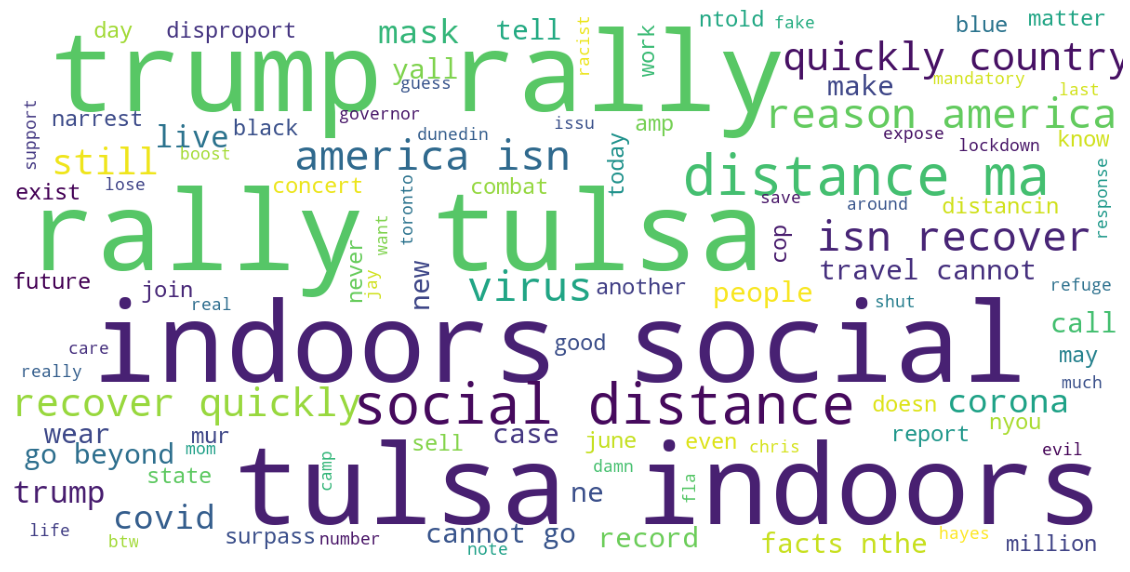

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data['cleaned_text'])

The analyzer returns 4 scores for each sentence namely, 'positive', 'negative', 'neutral' and 'compound'. The score 'compound' returns the overall sentiment of a sentence with range of [-1, 1]. For our current purpose, we want to classify each tweet into 5 classes and assign a range of values for each of them:

Very positive '5' - [0.55, 1.00]
Positive '4' - [0.10, 0.55)
Neutral '3' - (-0.10, 0.10)
Negative '2' - (-0.55, -0.10]
Very negative '1' - [-1.00, -0.55]

In [45]:

# Focus on 'compound' scores
# Create a new column called 'sentiment_class'
sentimentclass_list = []

for i in range(0, len(data)):
    
    # current 'compound' score:
    curr_compound = data.iloc[i,:]['compound']
    
    if (curr_compound <= 1.0 and curr_compound >= 0.55):
        sentimentclass_list.append(5)
    elif (curr_compound < 0.55 and curr_compound >= 0.10):
        sentimentclass_list.append(4)
    elif (curr_compound < 0.10 and curr_compound > -0.10):
        sentimentclass_list.append(3)
    elif (curr_compound <= -0.10 and curr_compound > -0.55):
        sentimentclass_list.append(2)
    elif (curr_compound <= -0.55 and curr_compound >= -1.00):
        sentimentclass_list.append(1)

# Add the new column 'sentiment_class' to the dataframe
data['sentiment_class'] = sentimentclass_list

# Check out the new column
data.tail()['sentiment_class']

26431    3
26432    4
26433    4
26434    3
26435    4
Name: sentiment_class, dtype: int64

In [46]:

# Verify if the classification assignment is correct:
data.iloc[0:5, :][['compound', 'sentiment_class']]


,compound,sentiment_class
0,-0.7430,1
1,0.7079,5
2,0.0258,3
3,-0.7430,1
4,-0.7430,1


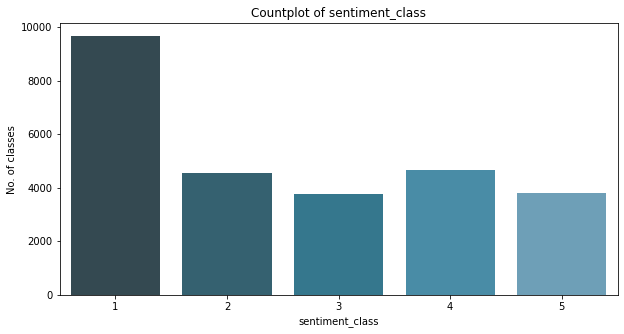

In [47]:
import seaborn as sns

# Distribution of sentiment_class
plt.figure(figsize = (10,5))
sns.set_palette('PuBuGn_d')
sns.countplot(data['sentiment_class'])
plt.title('Countplot of sentiment_class')
plt.xlabel('sentiment_class')
plt.ylabel('No. of classes')
plt.show()

In [48]:
# Display full text:
pd.set_option('display.max_colwidth', -1)

# Look at some examples of negative, neutral and positive tweets

# Filter 10 negative original tweets:
print("10 random negative original tweets and their sentiment classes:")
data[(data['sentiment_class'] == 1) | (data['sentiment_class'] == 2)].sample(n=10)[['text', 'sentiment_class']]

10 random negative original tweets and their sentiment classes:


,text,sentiment_class
7917,huhuhu I really miss how life was before the corona virus 🥺👉🏼👈🏼,2
4711,trump is still saying chinese virus. it’s been 6 months get over it u dumbass racist,1
62,"Trump's rally in Tulsa is indoors, with no social distancing and no mask requirements—all in violation of CDC guidelines. Trump is willing to spread the COVID-19 virus in order to hear some cheers. He is a direct threat to the health of the American people. He must be defeated.",1
15950,Give details of every coronavirus COVID-19 death to us: Centre instructs Delhi government | India News https://t.co/a54BSR3uTN,1
8612,"@weijia China Virus\nWu- Flu\nCorona virus\nWuhan Virus\nCovid -19\n'Rona\nQuit crying racism, it doesn't work for Asians.\nUnless you are crying reverse discrimination.",1
9951,Can the corona virus be over already. I want to go places when I’m bored but I can’t 😣😣😣 I hate 2020,1
9227,huhuhu I really miss how life was before the corona virus 🥺👉🏼👈🏼,2
19346,"Trump had a bad night in Tulsa. Very low turnout. Even his supporters know that COVID-19 is real and dangerous, and should not be spread at an indoor rally. More importantly, maybe people are catching on that he is a pathological liar and a fraud. Let's keep fighting.",1
25997,"Lobos, if you or someone you know suspects they might have contracted #COVID19.\n\nStop by @UNMLoboFB stadium parking lot this weekend &amp; get tested for COVID-19 at ""No-Cost""\n\nSpace is limited!\n\nREGISTER HERE | https://t.co/LFEuxeuL9y\n\nStay Safe &amp; #GoLobos https://t.co/OUwYv5nVX3",2
8332,"120,000 Americans have died from COVID-19 \n\nAt least 84,000 of these deaths could have been prevented if we had acted as quickly as Germany, Australia, South Korea and Singapore to prevent the spread of this deadly virus \n\nThis is the mind of a criminal \n\nhttps://t.co/KNQEDt5tgf https://t.co/Nu0ah86zh5",1


In [49]:
# Filter 10 neutral original tweets:
print("10 random neutral original tweets and their sentiment classes:")
data[(data['sentiment_class'] == 3)].sample(n=10)[['text', 'sentiment_class']]

10 random neutral original tweets and their sentiment classes:


,text,sentiment_class
16837,"distribution of IEC materials and House Visitation regarding COVID-2019 Awareness, Drugs Awareness, Anti-Rape and Anti-Insurgency Tips in connection with Community Mobilization Project and COVID-19 pandemic. https://t.co/ZujB8qBCgW",3
18556,"Key Biscayne Mayor Mike Davey \nSunday, June 21, 2020\nCOVID-19 Update \n\n#COVID19 #FlattenTheCurve\n@kb_mayor https://t.co/XECZIDnRAL",3
23225,States: *go into phase 4*\n\nCOVID-19 spreading from person to person: https://t.co/cLV6kOrVad,3
8066,"TRUMP ""Chinese Virus"" 🤣 https://t.co/wKvyHkqKqj",3
5573,"So its not any communist or those momediam radicals but its our own Dhiru bhai "" "" anil ambani who foresaw the chini corona virus pandemic and planned a perfect revenge on chini communists at right time......🤣🤣\n#BoycottMadeInChina\n#AntiNationalCongress \n#chinaindiaborder https://t.co/ZDUWKD6J5I",3
412,We’re at lacura tonight! Night out! Finally after two weeks with corona virus,3
2392,@dictatemusic covid is the disease coronavirus is the virus,3
13492,Measurement of airborne particle exposure during simulated tracheal intubation using various proposed aerosol containment devices during the COVID‐19 pandemic - ⁦@Anaes_Journal⁩ \n\nJust in case you were still planning to use an “aerosol box”! https://t.co/kfrBuzwhcO,3
11898,The other infectious diseases spreading in the shadow of the pandemic https://t.co/F03ZLkiCGn via @voxdotcom,3
15135,"@TeamPelosi But when the protesters marched, where was the Covid 19 concern??",3


In [51]:
# Filter 20 positive original tweets:
print("20 random positive original tweets and their sentiment classes:")
data[(data['sentiment_class'] == 4) | (data['sentiment_class'] == 5)].sample(n=20)[['text', 'sentiment_class']]

20 random positive original tweets and their sentiment classes:


,text,sentiment_class
3487,"Defended his leniency on Russia.\nPraised Slave owners.\nNever mentioned Floyd by name.\nExplained why he looks so senile.\nCalled Biden a socialist after throwing trillions of dollars at corporations. \nCalled the corona virus ""the sniffles""! \n#TrumpMeltdown",4
10496,"Dr. @Teddybird: In Metro Manila, we were able to raise our health system's capacity. COVID-19 cases are low in private hospitals and they've been accepting regular cases that need hospitalization",4
20512,The special #Covid19 compensation program at #CanadianBanks is coming to an end. https://t.co/Gt0wGsC9ro,4
14703,My son reenlisted indefinitely in the US Army. There was no signing ceremony because of Covid-19. He's serving our country honorably. I am so proud of you George ❤️🇺🇸 #ArmyMom #fathersday2020 https://t.co/QFIZ1I2HQI,5
10102,6 members of Trump's Tulsa advance staff have tested positive for COVID-19. Each may have infected hundreds with the virus already.,5
10357,"Crowd sizes don't determine elections, but I am genuinely surprised how small of a crowd showed up to see Trump in ruby red Tulsa. Maybe people in red states are more concerned about the Corona Virus than we thought?",4
2791,"COVID FACTS\nThe virus can travel 6' it cannot go beyond 6'1, it can live on all surfaces except anything from Amazon, it does not live in Walmart, Home Depot, or any grocery store, it's only deadly in small businesses, churches &amp; Trump rallies, but it cannot harm you protesting",5
21937,"@lonestarangle @KPRC2 Did you learn math at Trump University? Approximately 120,000 deaths out of 2.2 million #COVID cases in USA is a mortality rate of OVER 5%, which means survival rate of less than 95%. Everyone should be concerned and take such easy action like #WearAMask to reduce virus spread.",5
113,The real twist to who is behind the Corona Virus...\n\n(Man I spent way too long on this dumb joke hahaha) https://t.co/KByLlna3t0,4
13405,Jake Tapper: Did I just hear you say China created this virus?\n\nPeter Navarro: You did not hear me wrong. That virus was a product of the Chinese Communist Party. \n\nTapper: But you think it was purposely created?\n\nNavarro: That is an open question. https://t.co/gv4FBa2M0W,4


Popularity of Hashtags

In [52]:
# the column data['hashtags'] returns a list of string(s) for each tweet.
# Build a list of all hashtags in the dataset

hashtag_list = []

for i in range(0, len(data)):
    # Obtain the current list of hashtags
    curr_hashtag = data.iloc[i, :]['hashtags']
    
    # Extract and append the hashtags to 'hashtag_list':
    for j in range(0, len(curr_hashtag)):
        hashtag_list.append(curr_hashtag[j])
    
# Print out the list
print(hashtag_list)

['golf', 'jayjbmedia', 'healthoverneetjee', 'bycottchina', 'tibetisnotchina', 'covid', 'covid19', 'who', 'covid', 'openings', 'denial', 'risk', 'coronavirus', 'jump', 'cases', 'virus', 'wakeup_drrpnishank_pospon_jeeneet', 'coronavirus', 'athletes', 'cysticfibrosis', 'copd', 'asthma', 'respiratorydisease', 'covid19', 'covid_19', 'covid', 'bidenlandslide2020', 'cleanyourphone', 'cleanyourphone', 'covid19pandemic', 'covidー19', 'coronavirus', 'covid19usa', 'covid19us', 'covid', 'covid_19', 'covid19usa', 'coronavirususa', 'coronavirusoutbreak', 'coronavirus', 'covid19', 'covid19', 'who', 'covid', 'latinos', 'florida', 'govdesantis', 'latinos', 'hispanics', 'gop', 'dnc', 'votebluetoendthisnightmare', 'wmcactionnews5', 'covid', 'revivalcelebrationservice', 'wuhanvirus', 'covid19', 'covid', 'fauci', 'birx', 'bunkerboytrump', 'covid19', 'cancelcbseboardexams2020', 'covid19', 'brettcrozier', 'covidiots', 'covid19', 'covid19', 'who', 'newsupdate', 'clarkcountynv', 'breakingnews', 'newsalert', 'co

In [53]:

# No. of hashtags
print('No. of hashtags used in {} tweets is {}'.format(len(data), len(hashtag_list)))

No. of hashtags used in 26436 tweets is 5962


In [54]:

# Now we have the list of hashtags, we can convert this into a simple DataFrame, which will be used for visualization.
df_hashtag = pd.DataFrame(
    {'hashtags': hashtag_list}
)

print(df_hashtag.head())
print('Shape of df_hashtag is:', df_hashtag.shape)

            hashtags
0  golf             
1  jayjbmedia       
2  healthoverneetjee
3  bycottchina      
4  tibetisnotchina  
Shape of df_hashtag is: (5962, 1)


## Basic Visualization: All-time top N hashtags used

             hashtags  counts
349   coronavirus      515   
377   covid            437   
378   covid19          385   
407   covid_19         254   
1034  mitchmcconnell   185   
1618  trumprallyfail   185   
409   covid__19        134   
190   breaking         91    
430   crewnation       84    
682   globalgoalunite  70    
1635  tulsatrumprally  68    
731   happyfathersday  67    
1624  trumptulsarally  54    
966   maga2020         49    
1180  pandemic         29    


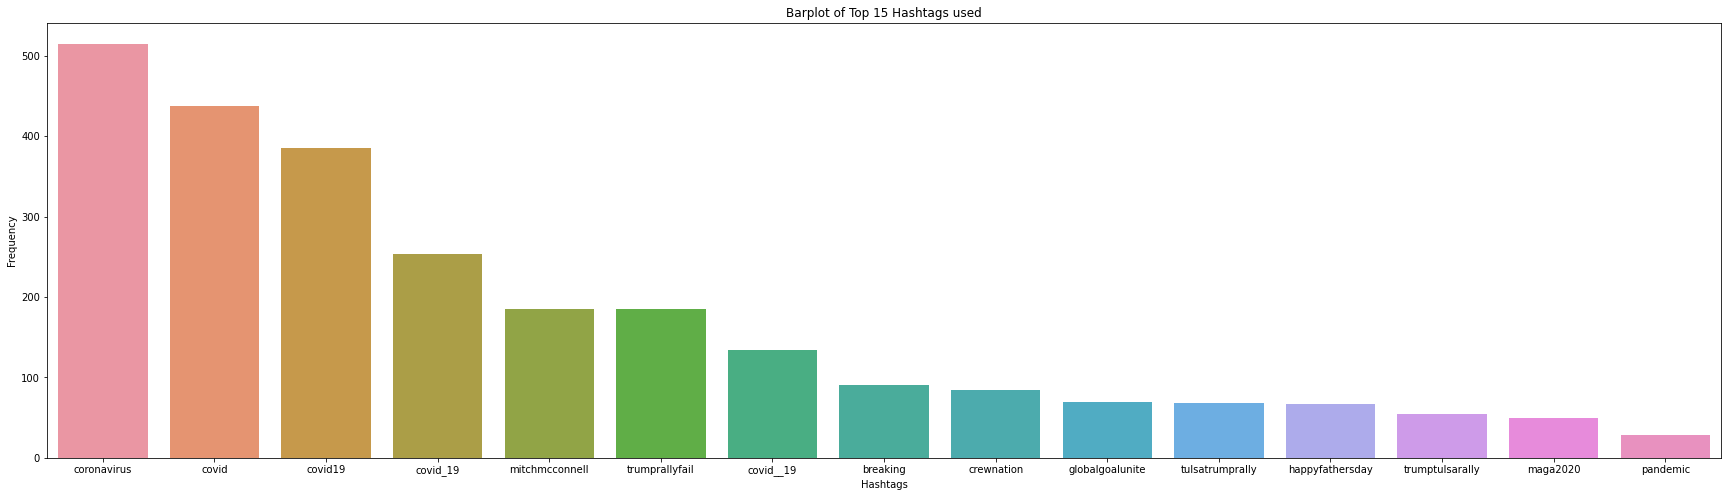

In [55]:
# The top 10 hashtags
N = 15
top_hashtags = df_hashtag.groupby(['hashtags']).size().reset_index(name = 'counts').sort_values(by = 'counts', ascending = False).head(N)
print(top_hashtags)

# seaborn countplot on the top 30 hashtags
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = top_hashtags)
plt.title('Barplot of Top ' + str(N) + ' Hashtags used')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()


In [57]:

from datetime import datetime

ind_to_drop = []
date = []

# First find out which 'tweetcreatedts' is not a string or in other weird formats
for i in range(0, len(data)):
    ith_date_str = data.iloc[i,:]['tweetcreatedts']
    ith_match = re.search(r'\d{4}-\d{2}-\d{2}', ith_date_str)
    if ith_match == None:
        ind_to_drop.append(i)
    else:
        continue

In [58]:
# Drop these rows using ind_to_drop
data.drop(ind_to_drop, inplace = True)

In [59]:

# Check new shape
data.shape

(26436, 130)

In [60]:
# Create a new list of datetime date objects from the tweets:
for i in range(0, len(data)):
    ith_date_str = data.iloc[i, :]['tweetcreatedts']
    ith_match = re.search(r'\d{4}-\d{2}-\d{2}', ith_date_str)
    ith_date = datetime.strptime(ith_match.group(), '%Y-%m-%d').date()
    
    date.append(ith_date)
    
# Size of list 'date'
print('Len of date list: ', len(date))

Len of date list:  26436


In [61]:
# Append 'date' to dataframe 'data' as 'dt_date' aka 'datetime_date'
data['dt_date'] = date

In [62]:
data['dt_date'].value_counts()

2020-06-22    11994
2020-06-21    7442 
2020-06-23    4000 
2020-06-20    3000 
Name: dt_date, dtype: int64

In [63]:
# Create a new dataframe first
timeseries_hashtags = pd.DataFrame(columns = ['hashtags', 'count', 'date', 'dayofnov'])

# Obtain a set of unique dates in 'date' list:
unique_date = np.unique(date)
print('Unique dates available in this dataset are:', unique_date)

Unique dates available in this dataset are: [datetime.date(2020, 6, 20) datetime.date(2020, 6, 21)
 datetime.date(2020, 6, 22) datetime.date(2020, 6, 23)]


In [64]:
# Define a function to create a visualization of top N hashtags for T number of days
    
def visualize_top_hashtags(main_df, timeseries_df, N, T, unique_dates):
    # main_df - main dataframe 'data'
    # timeseries_df - a new and empty dataframe to store the top hashtags 
    # N - number of top hashtags to consider
    # T - number of days to consider
    # unique_dates - list of unique dates available in the table
    
    # Returns:
    # timeseries_df
    
    # Start counter to keep track of number of days already considered
    counter = 1

    # Starting from the latest date in the list
    for ith_date in reversed(unique_dates):
        # Check if counter exceeds the number of days required, T:
        if counter <= T:
            
            # Filter tweets created on this date:
            ith_date_df = main_df[main_df['dt_date'] == ith_date]

            # From this particular df, build a list of all possible hashtags:
            ith_hashtag_list = []

            for i in range(0, len(ith_date_df)):
                # Obtain the current list of hashtags:
                curr_hashtag = ith_date_df.iloc[i,:]['hashtags']

                # Extract and append the hashtags to 'hashtag_list':
                for j in range(0, len(curr_hashtag)):
                    ith_hashtag_list.append(curr_hashtag[j])

            # Convert the list into a simple DataFrame
            ith_df_hashtag = pd.DataFrame({
                    'hashtags': ith_hashtag_list
            })

            # Obtain top N hashtags:
            ith_top_hashtags = ith_df_hashtag.groupby(['hashtags']).size().reset_index(name = 'count').sort_values(by = 'count', ascending = False).head(N)

            # Add date as a column
            ith_top_hashtags['date'] = ith_date
            ith_top_hashtags['dayofnov'] = ith_date.day

            # Finally, concat this dataframe to timeseries_hashtags
            timeseries_df = pd.concat([timeseries_df, ith_top_hashtags], axis = 0)

            # Increase counter by 1
            counter += 1
        
        else: # break the for loop
            break
    
    print('The newly created timeseries_hashtag of size {} is: '.format(timeseries_df.shape))
    timeseries_df.reset_index(inplace = True, drop = True)
    
    # Visualization
    plt.figure(figsize=(28,12))
    ax = sns.barplot(x = 'hashtags', 
                   y = 'count',
                   data = timeseries_df,
                   hue = 'dayofnov')

    # plt.xticks(np.arange(3, 6, step=1))
    # Moving legend box outside of the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # for legend text
    plt.setp(ax.get_legend().get_texts(), fontsize='22')
    # for legend title
    plt.setp(ax.get_legend().get_title(), fontsize='32') 
    plt.xlabel('Top Hashtags')
    plt.ylabel('Count of Hashtags')
    plt.title('Top ' + str(N) + ' Hashtags per day')
    sns.despine(left=True, bottom=True)
    plt.xticks(rotation = 45)
    plt.show()
    
    return timeseries_df

The newly created timeseries_hashtag of size (40, 4) is: 


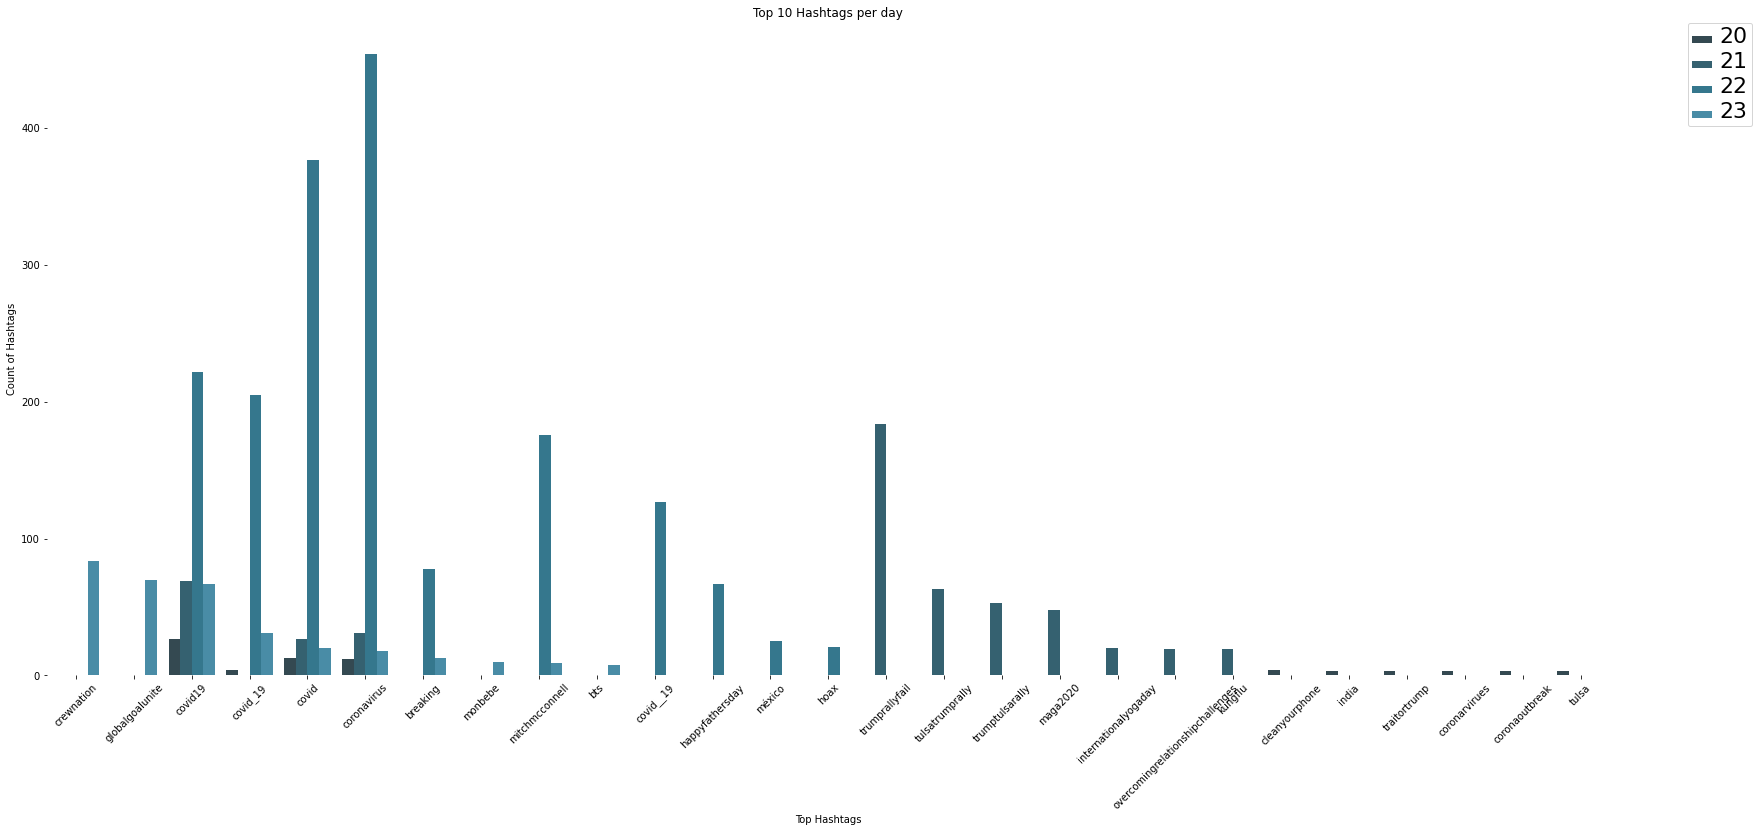

In [65]:

# Call function

timeseries_hashtags = visualize_top_hashtags(main_df = data,
                       timeseries_df = timeseries_hashtags,
                       N = 10,
                       T = 7,
                       unique_dates = unique_date)

In [66]:
# It turns out that some of the entries of 'retweetcount' is either in str or int
# We convert the data type of the column to all int using pd.to_numeric()
print('Current data type of "retweetcount" is:',data['retweetcount'].dtypes)
data['retweetcount'] = pd.to_numeric(arg = data['retweetcount'])
print('Current data type of "retweetcount" is:',data['retweetcount'].dtypes)

Current data type of "retweetcount" is: int64
Current data type of "retweetcount" is: int64


In [67]:
# Check out the sorted dataframe
data.sort_values(by = ['retweetcount'], ascending = False).head(2)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,...,word_tulsa,word_turnout,word_value,word_violation,word_virus,word_want,word_washington,word_willing,sentiment_class,dt_date
662,mmarianamerchan,n.a,n.a,38,2,23,2019-03-19 00:46:19,2020-06-20 01:56:27,250926,Donald Trump called the coronavirus the “Chinese virus” and called black people “thugs” but y’all still think he’s not racist??,...,0.0,0.0,0.0,0.0,0.230403,0.0,0.0,0.0,1,2020-06-20
8642,ty_bugie,rip daddy ..❤️,"new york, usa",1401,1284,43511,2011-09-24 23:35:28,2020-06-21 03:32:26,234368,*corona virus enters my body*\n\nThe 4 Flintstone gummies I ate in 2005: https://t.co/3STfdIQtaT,...,0.0,0.0,0.0,0.0,0.486247,0.0,0.0,0.0,3,2020-06-21


In [68]:
# Define a function that will pull out top N tweets of all time:
def alltime_top_tweets(df, N):
    # Arguments:
    # df - dataframe
    # N - top N tweets based on retweetcount
    
    # Sort according to 'retweetcount'
    top_tweets_df = df.sort_values(by = ['retweetcount'], ascending = False)
    # Drop also duplicates from the list, keep only the copy with higher retweetcount
    top_tweets_df.drop_duplicates(subset = 'text', keep = 'first', inplace = True)
    # Keep only N rows
    top_tweets_df = top_tweets_df.head(N)
    
    # Print out only important details 
    # username, tweetcreatedts, retweetcount, original text 'text'
    return top_tweets_df[['username', 'tweetcreatedts', 'retweetcount', 'text']]

In [69]:
# All-time top 10 tweets
print('All-time top 10 tweets:')
print('\n')
alltime_top_tweets(data, 10)

All-time top 10 tweets:




,username,tweetcreatedts,retweetcount,text
662,mmarianamerchan,2020-06-20 01:56:27,250926,Donald Trump called the coronavirus the “Chinese virus” and called black people “thugs” but y’all still think he’s not racist??
8642,ty_bugie,2020-06-21 03:32:26,234368,*corona virus enters my body*\n\nThe 4 Flintstone gummies I ate in 2005: https://t.co/3STfdIQtaT
9863,shaantaa1,2020-06-21 04:06:38,228548,"they’re being gassed, exposed to corona virus, raped by staff, sitting in their own pee &amp; shit, children going “missing”, &amp; so much other horrible things. no matter what ur views on illegal immigration is, u shouldn’t be ok with is. they’re fucking kids. https://t.co/tf5klU34sd"
26135,danie_d,2020-06-23 01:26:44,211373,COVID 19 is the worst disease process I’ve ever worked with in my 8 years as an ICU nurse. \n\nWhen they say “recovered” they don’t tell you that that means you may need a lung transplant. Or that you may come back after d/c with a massive heart attack or stroke bc COVID makes
22997,trendy_ki,2020-06-23 01:09:28,179666,A little wake up call for all of you not wearing masks:\n\nMy cousin checked into the hospital Tuesday morning for body aches and chills. They tested her for COVID-19 and her results came back positive. She died yesterday morning around 4 a.m. of kidney failure. She was 23.
19059,lily_krob,2020-06-22 03:22:39,166440,donald trump literally called the coronavirus the “chinese virus” and called black people “THUGS” and y’all still have the audacity to call him not racist?? WAKE UP
2039,jwroz79,2020-06-20 03:18:58,156862,Corona virus got a 97% survival rate nd the whole country panicking
17572,ABDDATA,2020-06-22 02:31:40,94934,My 22 year old grandson went to a party with about 30 people last week. No mask and no social distancing. He and 9 others have COVID-19. Tell the young people that think they are immune to this virus that it is real.
9440,PaniniMonini,2020-06-21 04:14:13,71376,“corona virus barely affects young people” bruh it’s a respiratory disease and half of y’alls lungs are ruined from vaping but go off
10445,kapekaya,2020-06-22 01:22:25,69306,"I’m moving $1B of my Square equity (~28% of my wealth) to #startsmall LLC to fund global COVID-19 relief. After we disarm this pandemic, the focus will shift to girl’s health and education, and UBI. It will operate transparently, all flows tracked here: https://t.co/hVkUczDQmz"


In [70]:

# Define another function as well
def specified_toptweets(df, spec_date, N):
    # Arguments
    # df - dataframe
    # N - top N tweets
    # date - enter particular date in str format i.e. '2019-11-02'
    
    # Specific date
    spec_date = datetime.strptime(spec_date, '%Y-%m-%d').date()
    
    # Filter df by date first
    date_df = df[df['dt_date'] == spec_date ]
    
    # Sort according to 'retweetcount'
    top_tweets_date_df = date_df.sort_values(by = ['retweetcount'], ascending = False)
    # Drop also duplicates from the list, keep only the copy with higher retweetcount
    top_tweets_date_df.drop_duplicates(subset = 'text', keep = 'first', inplace = True)
    # Keep only N rows
    top_tweets_date_df = top_tweets_date_df.head(N)
    
    print('Top ' + str(N) + ' tweets for date ' + str(spec_date) + ' are:')
    # Print out only important details 
    # username, tweetcreatedts, retweetcount, original text 'text'
    return top_tweets_date_df[['username', 'tweetcreatedts', 'retweetcount', 'text']]

In [72]:

# Try: top 10 tweets for 2020-06-22
specified_toptweets(data, '2020-06-22', 10)

Top 10 tweets for date 2020-06-22 are:


,username,tweetcreatedts,retweetcount,text
22419,NutAshes,2020-06-22 03:37:30,210939,COVID 19 is the worst disease process I’ve ever worked with in my 8 years as an ICU nurse. \n\nWhen they say “recovered” they don’t tell you that that means you may need a lung transplant. Or that you may come back after d/c with a massive heart attack or stroke bc COVID makes
22373,seananmcguire,2020-06-22 03:37:39,178247,A little wake up call for all of you not wearing masks:\n\nMy cousin checked into the hospital Tuesday morning for body aches and chills. They tested her for COVID-19 and her results came back positive. She died yesterday morning around 4 a.m. of kidney failure. She was 23.
19059,lily_krob,2020-06-22 03:22:39,166440,donald trump literally called the coronavirus the “chinese virus” and called black people “THUGS” and y’all still have the audacity to call him not racist?? WAKE UP
17572,ABDDATA,2020-06-22 02:31:40,94934,My 22 year old grandson went to a party with about 30 people last week. No mask and no social distancing. He and 9 others have COVID-19. Tell the young people that think they are immune to this virus that it is real.
10445,kapekaya,2020-06-22 01:22:25,69306,"I’m moving $1B of my Square equity (~28% of my wealth) to #startsmall LLC to fund global COVID-19 relief. After we disarm this pandemic, the focus will shift to girl’s health and education, and UBI. It will operate transparently, all flows tracked here: https://t.co/hVkUczDQmz"
15552,paulab1anca,2020-06-22 02:11:54,48815,"""are you wearing the C—""\n\n“the CDC recommended face covering because we’re still in the middle of the global COVID-19 pandemic? yeah, i am.” https://t.co/k0LZHbiXK4"
17359,lulubelles90210,2020-06-22 02:32:16,47368,BREAKING: law enforcement officials have seized thousands of cloth masks that were mailed to four different cities to protect Black Lives Matter protesters from COVID-19: https://t.co/EQLpDIk364
14801,hannah__150,2020-06-22 02:13:49,45944,"After 10 weeks of clapping for the NHS, the Tories have quietly announced they are terminating student nurse contracts out of the blue, after paying them for only one month of Covid-19 work, leaving them without income. Why is no one talking about this?"
21273,chanmiibb,2020-06-22 03:40:44,45562,hannah kim lost her grandma and her dad to covid-19. her mom remains in the icu. its just her and her brother now. they dont get to say goodbye. i want you to remember that when you go out to brunch and hang out with friends and continue to take this as a joke. think about hannah https://t.co/NGAxsiz1ZN
21200,mkd4vr,2020-06-22 03:40:57,44405,"Has COVID-19 forced you to wear glasses and a mask at the same time?\n\nIf so, you may be entitled to condensation."


In [73]:

# Obtain the list of unique dates again
unique_date = np.unique(date)
print('Unique dates available in this dataset are:')
print(unique_date)

Unique dates available in this dataset are:
[datetime.date(2020, 6, 20) datetime.date(2020, 6, 21)
 datetime.date(2020, 6, 22) datetime.date(2020, 6, 23)]


In [74]:

# Define another function, which is similar to the one from above 'visualize_top_hashtags':

def past_toptweets(df, T, N, unique_date):
    # Arguments:
    # df - dataframe 'data'
    # T - last T days 
    # N - top N tweets
    # List of all unique dates in dataset
    
    # Create a df to store top tweets for all T dates, in case there is a need to manipulate this df
    past_toptweets_df = pd.DataFrame(columns = ['username', 'tweetcreatedts', 'retweetcount', 'text'])
    print(past_toptweets_df)
    
    # Filter data according to last T dates first:
    # Do a check that T must not be greater than the no. of elements in unique_date
    if T <= len(unique_date):
        unique_date = unique_date[-T:] # a list
    else:
        raise Exception('T must be smaller than or equal to the number of dates in the dataset!')
    
    # Print out top N for each unique_date one after another, starting from the latest:
    for ith_date in reversed(unique_date):
        # Filter tweets created on this date:
        ith_date_df = df[df['dt_date'] == ith_date]
        
        # Sort according to 'retweetcount'
        top_tweets_date_df = ith_date_df.sort_values(by = ['retweetcount'], ascending = False)
        # Drop also duplicates from the list, keep only the copy with higher retweetcount
        top_tweets_date_df.drop_duplicates(subset = 'text', keep = 'first', inplace = True)
        # Keep only N rows
        top_tweets_date_df = top_tweets_date_df.head(N)
        # Keep only essential columns
        top_tweets_date_df = top_tweets_date_df[['username', 'tweetcreatedts', 'retweetcount', 'text']]
        
        # Append top_tweets_date_df to past_toptweets_df
        past_toptweets_df = pd.concat([past_toptweets_df, top_tweets_date_df], axis = 0)
        
        # Print out the top tweets for this ith_date
        print('Top ' + str(N) + ' tweets for date ' + str(ith_date) + ' are:')
        # print only essential columns:
        print(top_tweets_date_df)
        print('\n')
    
    return past_toptweets_df

In [76]:
past_toptweets(data, T = 3, N = 2, unique_date = unique_date)

Empty DataFrame
Columns: [username, tweetcreatedts, retweetcount, text]
Index: []
Top 2 tweets for date 2020-06-23 are:
        username       tweetcreatedts  retweetcount  \
26135  danie_d    2020-06-23 01:26:44  211373         
22997  trendy_ki  2020-06-23 01:09:28  179666         

                                                                                                                                                                                                                                                                                        text  
26135  COVID 19 is the worst disease process I’ve ever worked with in my 8 years as an ICU nurse. \n\nWhen they say “recovered” they don’t tell you that that means you may need a lung transplant. Or that you may come back after d/c with a massive heart attack or stroke bc COVID makes  
22997  A little wake up call for all of you not wearing masks:\n\nMy cousin checked into the hospital Tuesday morning for body aches and chi

,username,tweetcreatedts,retweetcount,text
26135,danie_d,2020-06-23 01:26:44,211373,COVID 19 is the worst disease process I’ve ever worked with in my 8 years as an ICU nurse. \n\nWhen they say “recovered” they don’t tell you that that means you may need a lung transplant. Or that you may come back after d/c with a massive heart attack or stroke bc COVID makes
22997,trendy_ki,2020-06-23 01:09:28,179666,A little wake up call for all of you not wearing masks:\n\nMy cousin checked into the hospital Tuesday morning for body aches and chills. They tested her for COVID-19 and her results came back positive. She died yesterday morning around 4 a.m. of kidney failure. She was 23.
22419,NutAshes,2020-06-22 03:37:30,210939,COVID 19 is the worst disease process I’ve ever worked with in my 8 years as an ICU nurse. \n\nWhen they say “recovered” they don’t tell you that that means you may need a lung transplant. Or that you may come back after d/c with a massive heart attack or stroke bc COVID makes
22373,seananmcguire,2020-06-22 03:37:39,178247,A little wake up call for all of you not wearing masks:\n\nMy cousin checked into the hospital Tuesday morning for body aches and chills. They tested her for COVID-19 and her results came back positive. She died yesterday morning around 4 a.m. of kidney failure. She was 23.
8529,__lexisbaby,2020-06-21 03:34:17,234368,*corona virus enters my body*\n\nThe 4 Flintstone gummies I ate in 2005: https://t.co/3STfdIQtaT
9351,y_jxo,2020-06-21 04:15:43,228548,"they’re being gassed, exposed to corona virus, raped by staff, sitting in their own pee &amp; shit, children going “missing”, &amp; so much other horrible things. no matter what ur views on illegal immigration is, u shouldn’t be ok with is. they’re fucking kids. https://t.co/tf5klU34sd"


## we want to know who are the users who have been relatively more active in tweeting tweets related to the protests.

In [77]:
top_user_df = pd.DataFrame(columns = ['username', 'noTweets', 'noFollowers', 'dt_date'])

# Convert datatype of 'totaltweets' to numeric
pd.to_numeric(data['totaltweets'])

for ith_date in unique_date:
    print('Current loop: ', ith_date)
    
    temp = data[data['dt_date'] == ith_date]
    
    # pd.DataFrame - count number of tweets tweeted in that day - noTweets
    temp_noTweets = temp.groupby(['username']).size().reset_index(name = 'noTweets').sort_values(by = 'username', ascending = False)
    
    # pd.Series - count max followers - might fluctuate during the day
    temp_noFollowing = temp.groupby(['username'])['followers'].max().reset_index(name = 'noFollowers').sort_values(by = 'username', ascending = False)['noFollowers']
    
    # *** NOT WORKING
    # pd.Series - count max totaltweets - might fluctuate during the day. Note this is historical total number of tweets ever since the user is created.
    # temp_noTotaltweets = temp.groupby(['username'])['totaltweets'].max().reset_index(name = 'noTotaltweets').sort_values(by = 'username', ascending = False)['noTotaltweets']
    
    # Concat series to temp_noTweets, which will be the main df
    final = pd.concat([temp_noTweets, temp_noFollowing], axis = 1) # add as columns
    final['dt_date'] = ith_date
    
    print(final)
    
    # Append 'final' dataframe to top_user_df
    top_user_df = pd.concat([top_user_df, final])

Current loop:  2020-06-20
             username  noTweets  noFollowers     dt_date
2927  zuokanyunqishi8  1         72           2020-06-20
2926  zukothedragon    1         463          2020-06-20
2925  zoyaaacon        1         134          2020-06-20
2924  zombozzy         1         68           2020-06-20
2923  zoee_berman      1         409          2020-06-20
2922  zcatdiva         1         55           2020-06-20
2921  yvonnenevala     1         858          2020-06-20
2920  yoyodebzo        1         33           2020-06-20
2919  yourcupofteaaa   1         589          2020-06-20
2918  younglady037833  1         1488         2020-06-20
2917  young_maymay     1         1282         2020-06-20
2916  yougo_JENN_coco  1         63           2020-06-20
2915  yoquieropizza    1         839          2020-06-20
2914  yogigolfer18     1         10           2020-06-20
2913  yogabbagabstah   1         162          2020-06-20
2912  ynwafiIms        1         9            2020-06-20
2911 

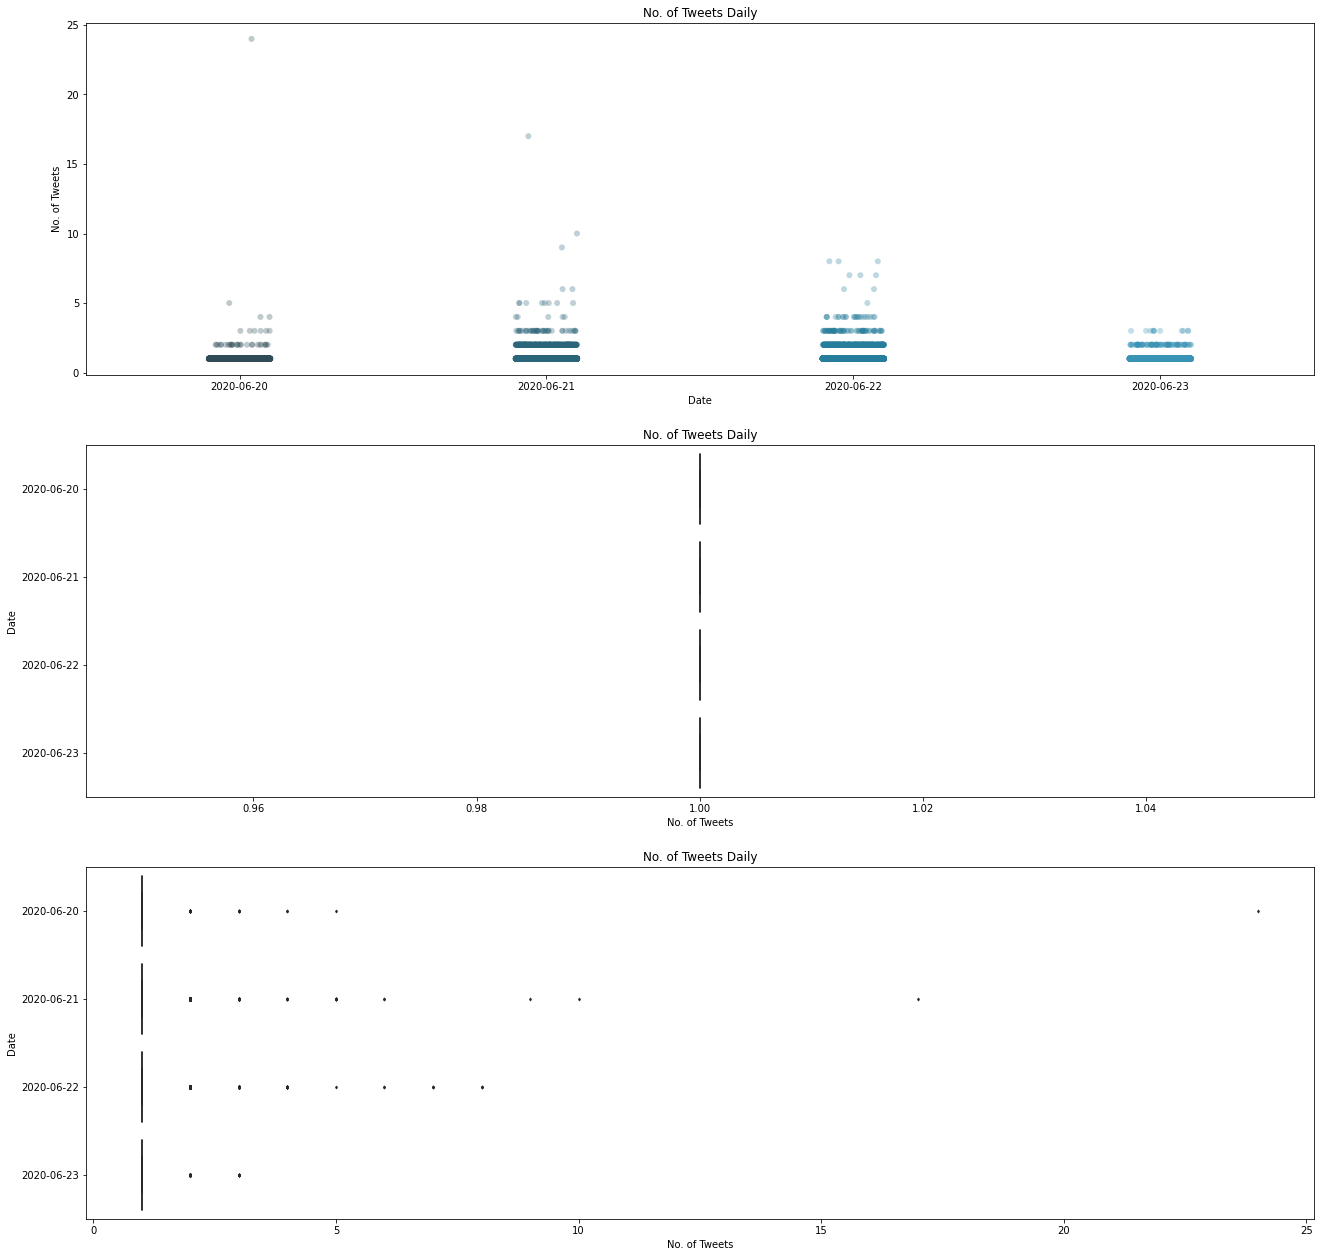

In [78]:

# hue = retweetcount and followers, totaltweets
f, axes = plt.subplots(3, 1, figsize = (22,22))
sns.set_palette('PuBuGn_d')
sns.stripplot(x = 'dt_date', y = 'noTweets', data = top_user_df, jitter = True, ax = axes[0], size = 6, alpha = 0.3)
sns.boxplot(y = 'dt_date', x = 'noTweets', data = top_user_df, orient = 'h', showfliers=False, ax = axes[1])
sns.boxplot(y = 'dt_date', x = 'noTweets', data = top_user_df, orient = 'h', showfliers=True, fliersize = 2.0, ax = axes[2])

# Axes and titles for each subplot
axes[0].set_xlabel('Date')
axes[0].set_ylabel('No. of Tweets')
axes[0].set_title('No. of Tweets Daily')

axes[1].set_xlabel('No. of Tweets')
axes[1].set_ylabel('Date')
axes[1].set_title('No. of Tweets Daily')

axes[2].set_xlabel('No. of Tweets')
axes[2].set_ylabel('Date')
axes[2].set_title('No. of Tweets Daily')

plt.show()

## Location of Twitter Users

In [80]:
location = data['location']
print('No. of distinct locations listed by twitter users is:', len(location.value_counts()))
unique_locations = location.value_counts()

# Remove n.a.
unique_locations = pd.DataFrame({'locations': unique_locations.index,
                                'count': unique_locations.values})
unique_locations.drop(0, inplace = True)

# See top few locations
unique_locations.sort_values(by = 'count', ascending = False).head(10)

No. of distinct locations listed by twitter users is: 7773


,locations,count
1,united states,576
2,usa,198
3,"california, usa",195
4,india,176
5,"texas, usa",163
6,"los angeles, ca",155
7,"florida, usa",142
8,"houston, tx",120
9,"chicago, il",114
11,canada,101


In [85]:
# Obtain the row index of locations that contain India:
india = unique_locations[unique_locations['locations'] == 'india']





In [95]:
unique_location_temp=unique_locations.iloc[:10,]

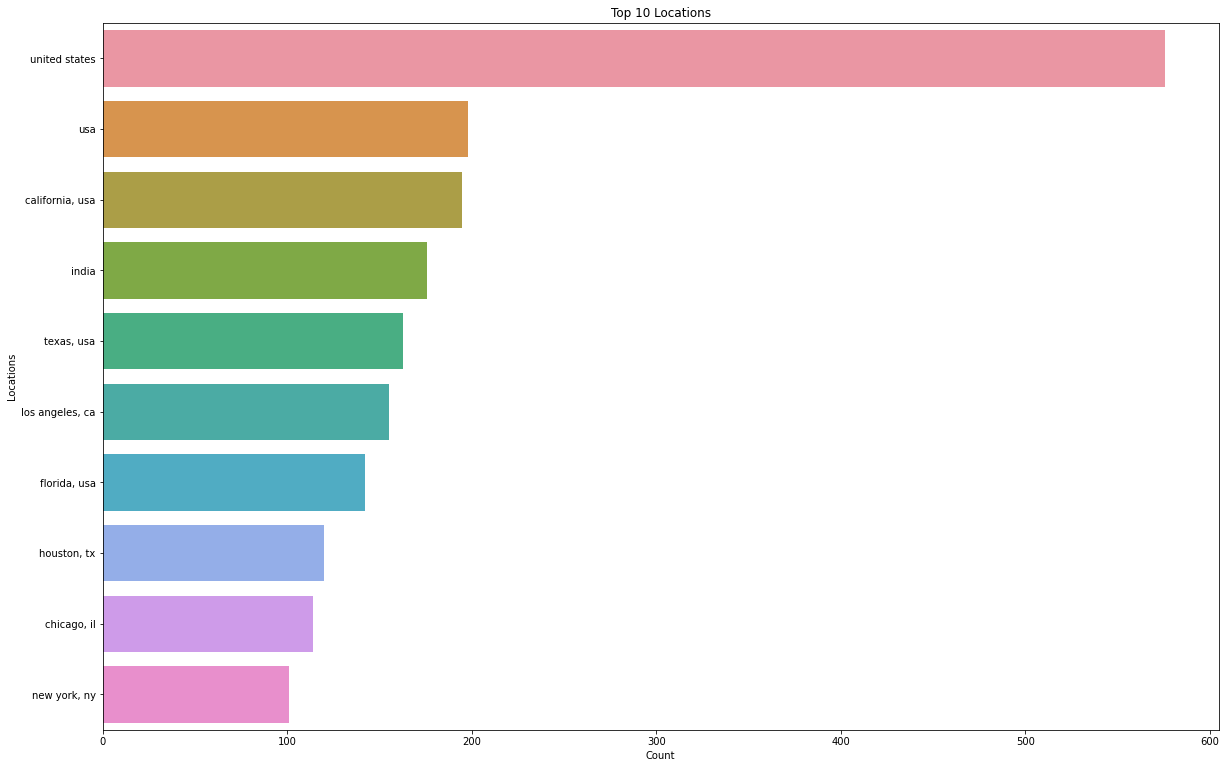

In [96]:
# Plot a bar plot
plt.figure(figsize=(20,13))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'count', y = 'locations', orient = 'h',data = unique_location_temp)
plt.xlabel('Count')
plt.ylabel('Locations')
plt.title('Top 10 Locations')
plt.show()

Top users with most followers

In [98]:

# Reuse code from top_user_df
# Sort according to noFollowers
top_user_df = top_user_df.sort_values(by = 'noFollowers', ascending = False)
user_most_followers = top_user_df.groupby('username')['noFollowers', 'dt_date'].max().sort_values(by = 'noFollowers', ascending = False)
user_most_followers['username'] = user_most_followers.index
user_most_followers.reset_index(inplace = True, drop = True)
user_most_followers

,noFollowers,dt_date,username
0,22051278,2020-06-23,Reuters
1,7580732,2020-06-23,people
2,7518552,2020-06-22,htTweets
3,6968366,2020-06-22,ABSCBNNews
4,6476314,2020-06-22,business
5,6194947,2020-06-22,the_hindu
6,5888386,2020-06-20,laurDIY
7,5746306,2020-06-22,gmanews
8,5639889,2020-06-23,El_Universal_Mx
9,4970807,2020-06-22,ANCALERTS


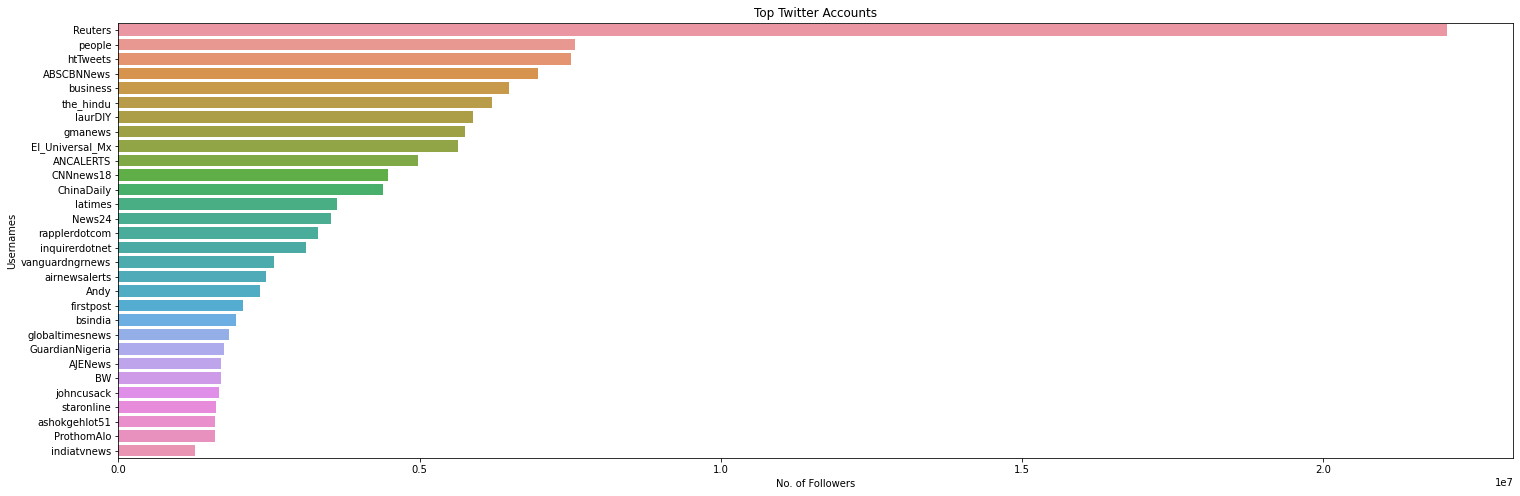

In [99]:

# plot
plt.figure(figsize = (25, 8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'noFollowers', y = 'username', orient = 'h', data = user_most_followers.head(30))
plt.xlabel('No. of Followers')
plt.ylabel('Usernames')
plt.title('Top Twitter Accounts')
plt.show()

## Most Mentioned Username

In [100]:

def find_users(df):
    # df: dataframe to look at
    # returns a list of usernames
    
    # Create empty list
    list_users = []
    
    for i in range(0, len(df)):
        users_ith_text = re.findall('@[^\s]+', df.iloc[i,:]['text'])
        # returns a list
        # append to list_users by going through a for-loop:
        for j in range(0, len(users_ith_text)):
            list_users.append(users_ith_text[j])
    
    return list_users

In [101]:
# Apply on dataframe data['text']
list_users = find_users(data)

mentioned_users_df = pd.DataFrame({
    'mentioned_users': list_users
})

mentioned_users_df.head()

,mentioned_users
0,@cnnbrk
1,@donlemon
2,@andersoncooper
3,@jaketapper
4,@Damn_its_Tago


In [102]:

mentionedusers = mentioned_users_df.groupby('mentioned_users').size().reset_index(name = 'totalcount').sort_values(by = 'totalcount', ascending = False)
mentionedusers.head()

,mentioned_users,totalcount
4411,@realDonaldTrump,725
3626,@globaltimesnews,107
305,@BTS_twt,96
4841,@weijia,92
2007,@NewIndianXpress,89


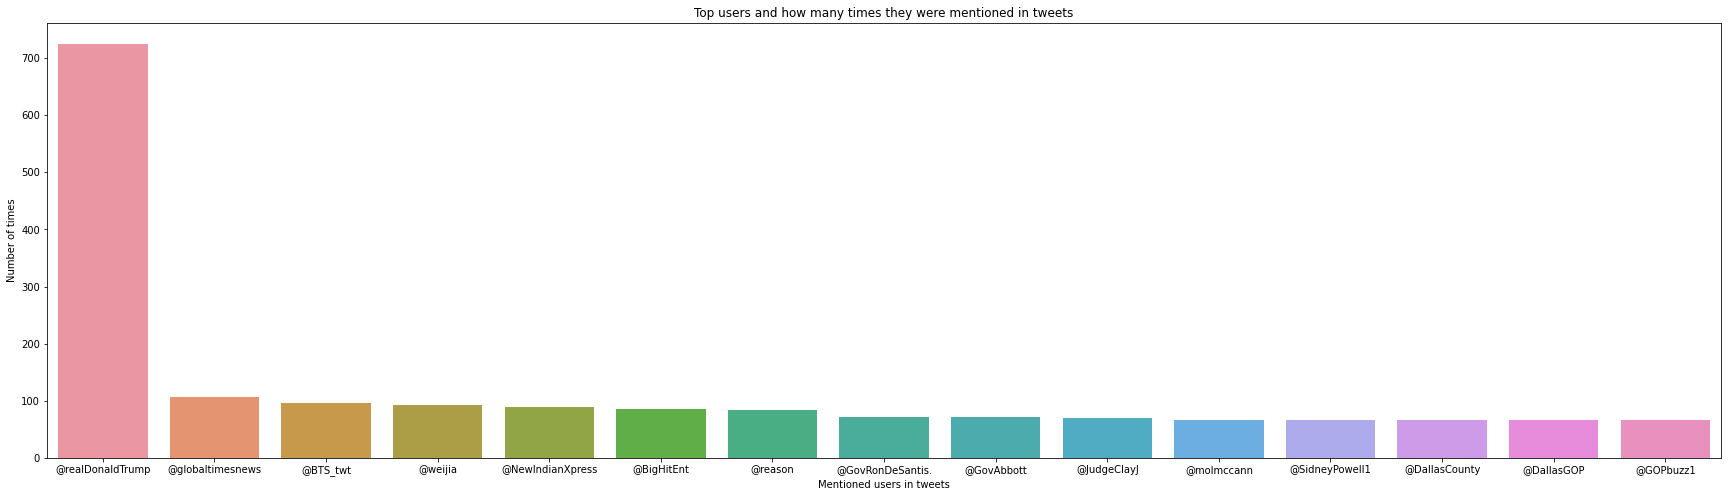

In [103]:

plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'mentioned_users', y = 'totalcount', data = mentionedusers.head(15))
plt.xlabel('Mentioned users in tweets')
plt.ylabel('Number of times')
plt.title('Top users and how many times they were mentioned in tweets')
plt.show()